
<center><h1>Assignment 2</h1></center>
<center><h4>Athina Ibanez Oktaviolla || PYTN-KS01-009</h4></center>
<hr>

In [1]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import statistics
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#membaca data
df = pd.read_csv("dataset/nyc-rolling-sales.csv")
pd.set_option('display.max_columns', None )

In [3]:
df.head() 

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [5]:
#melihat kategoi dari masing-masing kolom bertype data object
{col: len(df[col].unique()) for col in df.columns}

{'Unnamed: 0': 26736,
 'BOROUGH': 5,
 'NEIGHBORHOOD': 254,
 'BUILDING CLASS CATEGORY': 47,
 'TAX CLASS AT PRESENT': 11,
 'BLOCK': 11566,
 'LOT': 2627,
 'EASE-MENT': 1,
 'BUILDING CLASS AT PRESENT': 167,
 'ADDRESS': 67563,
 'APARTMENT NUMBER': 3989,
 'ZIP CODE': 186,
 'RESIDENTIAL UNITS': 176,
 'COMMERCIAL UNITS': 55,
 'TOTAL UNITS': 192,
 'LAND SQUARE FEET': 6062,
 'GROSS SQUARE FEET': 5691,
 'YEAR BUILT': 158,
 'TAX CLASS AT TIME OF SALE': 4,
 'BUILDING CLASS AT TIME OF SALE': 166,
 'SALE PRICE': 10008,
 'SALE DATE': 364}

### Kolom yang harus di hapus, yaitu:
1. Unnamed: 0, Karena tidak ada keterangannya di kaggle (tidak dibutuhkan)
2. EASE-MENT, karena uniquenya hanya 1 yang berarti kolom tersebut kosong
3. ADDRESS, APARTMENT NUMBER, LOT, karenaterlalu banyak unique value dan tidak dibutuhkan nantinya. Lebih baik dihapus untuk mengurangi jumlah data.

In [6]:
# drop kolom Unnamed: 0, EASE-MENT, ADDRESS, dan APARTMENT NUMBER
df = df.drop(["Unnamed: 0", "LOT", "EASE-MENT", "ADDRESS", "APARTMENT NUMBER"], axis=1)

In [7]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [8]:
#melihat unique values dari kolom SALE PRICE untuk menemukan missing values.
df["SALE PRICE"].unique()

array(['6625000', ' -  ', '3936272', ..., '408092', '11693337', '69300'],
      dtype=object)

##### LAND SQUARE FEET, GROSS SQUARE FEET, dan SALE PRICE yang seharusnya bertype data integer. Kemungkinan terdapat missing values.
note: setelah mencoba ubah type data, ternyata error karena ada ' - ' value, value ini akan diubah jadi NaN

In [9]:
# mengganti nilai ' -  ' dengan Nan dan type data diubah menjadi float
df = df.replace([' -  '] , np.NaN)

In [10]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,10009,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,10009,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


## MEASURE OF CENTRAL TENDENCY

In [11]:
#menghapus bari yang memiliki Nan
df = df.dropna(axis=0)

In [12]:
#reset index
df=df.reset_index()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48244 entries, 0 to 48243
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   index                           48244 non-null  int64 
 1   BOROUGH                         48244 non-null  int64 
 2   NEIGHBORHOOD                    48244 non-null  object
 3   BUILDING CLASS CATEGORY         48244 non-null  object
 4   TAX CLASS AT PRESENT            48244 non-null  object
 5   BLOCK                           48244 non-null  int64 
 6   BUILDING CLASS AT PRESENT       48244 non-null  object
 7   ZIP CODE                        48244 non-null  int64 
 8   RESIDENTIAL UNITS               48244 non-null  int64 
 9   COMMERCIAL UNITS                48244 non-null  int64 
 10  TOTAL UNITS                     48244 non-null  int64 
 11  LAND SQUARE FEET                48244 non-null  object
 12  GROSS SQUARE FEET               48244 non-null

In [14]:
#menghapus kolom index
df= df.drop(["index"], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48244 entries, 0 to 48243
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         48244 non-null  int64 
 1   NEIGHBORHOOD                    48244 non-null  object
 2   BUILDING CLASS CATEGORY         48244 non-null  object
 3   TAX CLASS AT PRESENT            48244 non-null  object
 4   BLOCK                           48244 non-null  int64 
 5   BUILDING CLASS AT PRESENT       48244 non-null  object
 6   ZIP CODE                        48244 non-null  int64 
 7   RESIDENTIAL UNITS               48244 non-null  int64 
 8   COMMERCIAL UNITS                48244 non-null  int64 
 9   TOTAL UNITS                     48244 non-null  int64 
 10  LAND SQUARE FEET                48244 non-null  object
 11  GROSS SQUARE FEET               48244 non-null  object
 12  YEAR BUILT                      48244 non-null

In [16]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,C4,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
4,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,D9,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [17]:
#mengambil data yang dibutuhkan dan mengubah type datanya menjadi float
df = df[["LAND SQUARE FEET", "GROSS SQUARE FEET", "SALE PRICE"]].astype(float)
df

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
0,1633.0,6440.0,6625000.0
1,2272.0,6794.0,3936272.0
2,2369.0,4615.0,8000000.0
3,1750.0,4226.0,3192840.0
4,4489.0,18523.0,16232000.0
...,...,...,...
48239,2400.0,2575.0,450000.0
48240,2498.0,2377.0,550000.0
48241,4000.0,1496.0,460000.0
48242,208033.0,64117.0,11693337.0


In [18]:
#Mean
price= df["SALE PRICE"]
mean = price.mean()
mean

1153281.4458170964

In [19]:
#Median
median = price.median()
median

480000.0

In [20]:
#MODUS
modus = price.mode()
modus

0    0.0
dtype: float64

## MEASURE OF SPREAD

In [21]:
#RANGE
rang = np.ptp(price)
rang

2210000000.0

In [22]:
#VARIANCE
VAR = statistics.variance(price)
VAR

179595088101951.1

In [23]:
#STANDARD DEVIATION
std = statistics.stdev(price)
std

13401309.193580719

## PROBABILITY DISTRIBUTION

In [24]:
print(price.min(),price.max())

0.0 2210000000.0


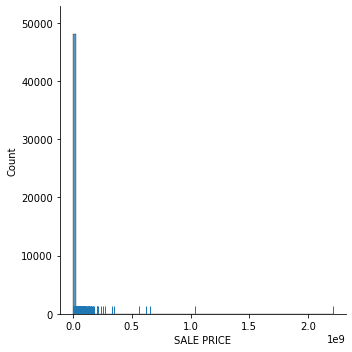

In [25]:
sns.displot(df["SALE PRICE"], bins=100, rug=True)

Dari diragram terlihat bahwa distribusi dari data tidak baik karena banyak data yang 0. Karena itu akan diambil data dari rentang 10.000 -10.000.000

In [26]:
norm_df = price[(price>10000) & (price<10000000)]

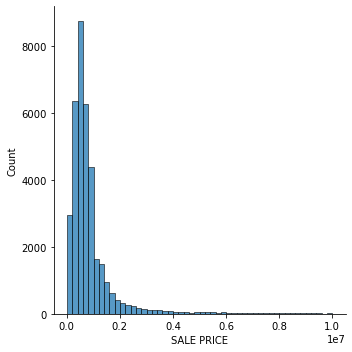

In [27]:
sns.displot(norm_df, bins=50)

Dapat dilihat distribusi data lebih baik namun belum di terdistribusi normal, sehingga perlu di transformasikan

In [28]:
log_df = np.log(norm_df)

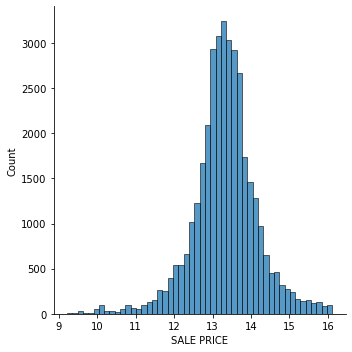

In [29]:
sns.displot(log_df, bins=50)

## CONFIDENCE INTERVALS

In [30]:
new_mean = log_df.mean()
new_mean

13.319794410142904

In [31]:
new_std = log_df.std()
new_std

0.8453316142061013

In [32]:
sample_means = []
n = 20

for sam in range(0,500):
    sample_values = np.random.choice(a=log_df, size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Sample Means')

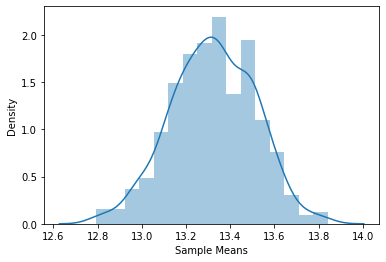

In [33]:
sns.distplot(sample_means)
plt.xlabel("Sample Means")

In [34]:
median_of_sample_means = np.median(sample_means)
median_of_sample_means

13.326001092938428

In [35]:
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

13.32144900839863

In [36]:
sample_std = np.std(sample_means)
sample_std

0.18910983260068126

In [37]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [38]:
1 - (tail * 2)

0.950004209703559

In [39]:
standard_error = new_std/np.sqrt(n)
standard_error

0.18902189528944693

In [40]:
lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
lower_95_perc_bound

12.950966093631315

In [41]:
upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error
upper_95_perc_bound

13.691931923165946

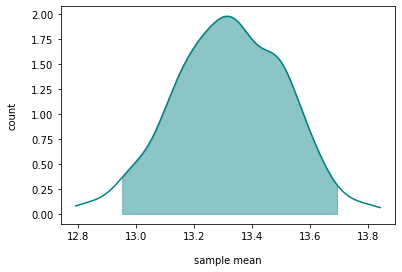

In [ ]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
plt.xlabel("sample mean", labelpad=14)
plt.ylabel("count", labelpad=14);

## HYPOTHESIS TESTING

In [ ]:
stat, p = shapiro(log_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')